In [49]:
import numpy as np
import os
import os.path as op
import h5py
import shutil
import requests
import statistics
import re

import matplotlib.pyplot as plt

In [17]:
data_path = 'data/098/'

In [32]:
files = os.listdir(data_path)
g16_07_files = [f for f in files if re.match(r'.*M6C07_G16_.*', f)]
g16_08_files = [f for f in files if re.match(r'.*M6C08_G16_.*', f)]
g16_09_files = [f for f in files if re.match(r'.*M6C09_G16_.*', f)]
g16_10_files = [f for f in files if re.match(r'.*M6C10_G16_.*', f)]
g17_07_files = [f for f in files if re.match(r'.*M6C07_G17_.*', f)]
g17_08_files = [f for f in files if re.match(r'.*M6C08_G17_.*', f)]
g17_09_files = [f for f in files if re.match(r'.*M6C09_G17_.*', f)]
g17_10_files = [f for f in files if re.match(r'.*M6C10_G17_.*', f)]

In [46]:
n = 2 #number of timestamps to load (1 timestamp = 8 files)

g16_07_data = []
g16_08_data = []
g16_09_data = []
g16_10_data = []
g17_07_data = []
g17_08_data = []
g17_09_data = []
g17_10_data = []

for i in range(n):
    g16_07_data.append(np.load(data_path+g16_07_files[i]))
    g16_08_data.append(np.load(data_path+g16_08_files[i]))
    g16_09_data.append(np.load(data_path+g16_09_files[i]))
    g16_10_data.append(np.load(data_path+g16_10_files[i]))
    g17_07_data.append(np.load(data_path+g17_07_files[i]))
    g17_08_data.append(np.load(data_path+g17_08_files[i]))
    g17_09_data.append(np.load(data_path+g17_09_files[i]))
    g17_10_data.append(np.load(data_path+g17_10_files[i]))

In [48]:
np.shape(g16_07_data)

(2, 1001, 401)

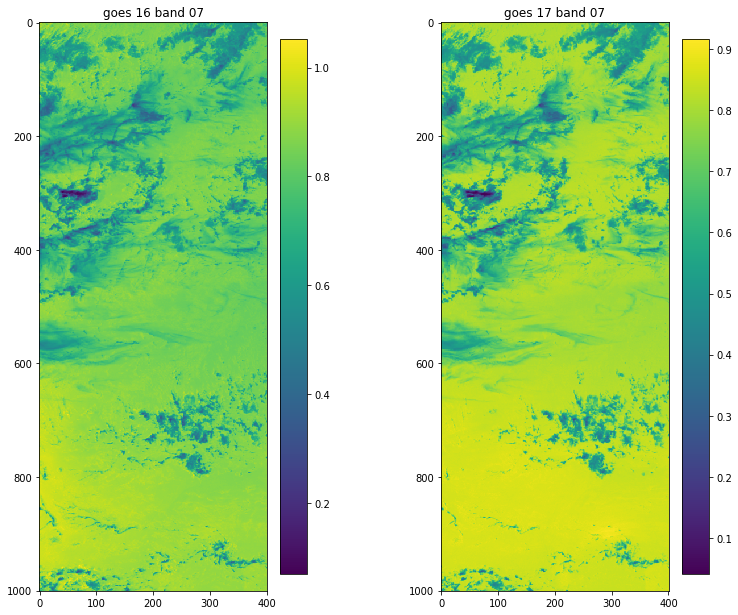

In [126]:
#testing difference in colors
fig, axs = plt.subplots(1, 2, figsize=(12, 18))
fig.subplots_adjust(wspace=0.5)

img1 = axs[0].imshow(g16_07_data[0], interpolation='none')
axs[0].set_title('goes 16 band 07')
fig.colorbar(img1, ax=axs[0], fraction=0.1)


img2 = axs[1].imshow(g17_07_data[0], interpolation='none')
axs[1].set_title('goes 17 band 07')
fig.colorbar(img2, ax=axs[1], fraction=0.1)


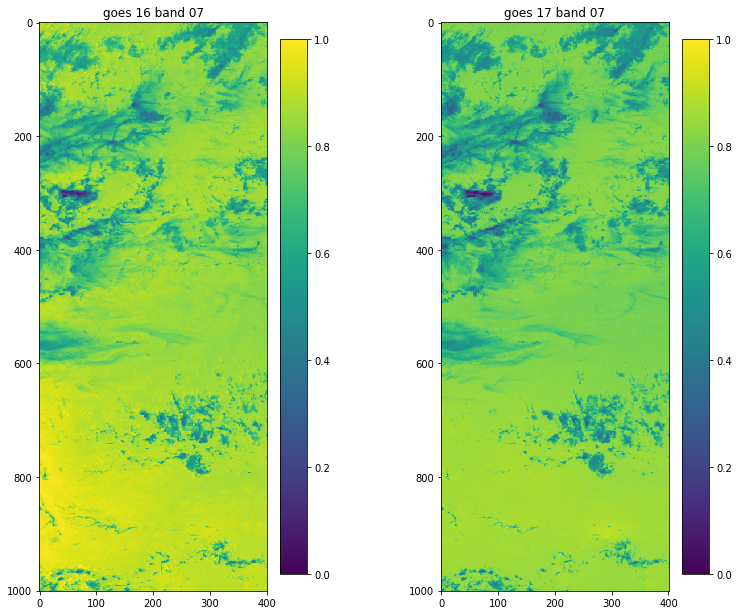

In [132]:
#adjusting min/max mapping values
fig, axs = plt.subplots(1, 2, figsize=(12, 18))
fig.subplots_adjust(wspace=0.5)

img1 = axs[0].imshow(g16_07_data[0], interpolation='none', vmin = 0, vmax=1)
axs[0].set_title('goes 16 band 07')
fig.colorbar(img1, ax=axs[0], fraction=0.1)


img2 = axs[1].imshow(g17_07_data[0], interpolation='none', vmin = 0, vmax=1)
axs[1].set_title('goes 17 band 07')
fig.colorbar(img2, ax=axs[1], fraction=0.1)

In [162]:
#exploring the difference between bands
diff_07 = abs(g17_07_data[0]-g16_07_data[0])
diff_08 = abs(g17_08_data[0]-g16_08_data[0])
diff_09 = abs(g17_09_data[0]-g16_09_data[0])
diff_10 = abs(g17_10_data[0]-g16_10_data[0])


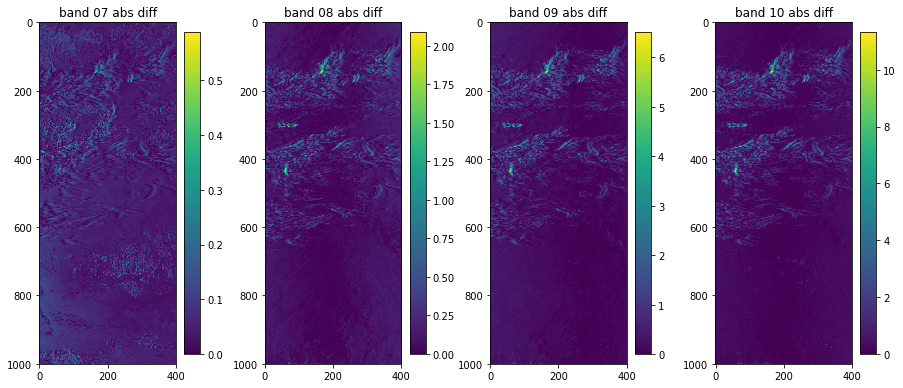

In [163]:
fig, axs = plt.subplots(1, 4, figsize=(15, 25))
fig.subplots_adjust(wspace=0.4)

img0 = axs[0].imshow(diff_07,interpolation='none')
axs[0].set_title('band 07 abs diff')
fig.colorbar(img0, ax=axs[0], fraction=0.1)

img1 = axs[1].imshow(diff_08,interpolation='none')
axs[1].set_title('band 08 abs diff')
fig.colorbar(img1, ax=axs[1], fraction=0.1)

img2 = axs[2].imshow(diff_09,interpolation='none')
axs[2].set_title('band 09 abs diff')
fig.colorbar(img2, ax=axs[2], fraction=0.1)

img3 = axs[3].imshow(diff_10,interpolation='none')
axs[3].set_title('band 10 abs diff')
fig.colorbar(img3, ax=axs[3], fraction=0.1)

plt.show()

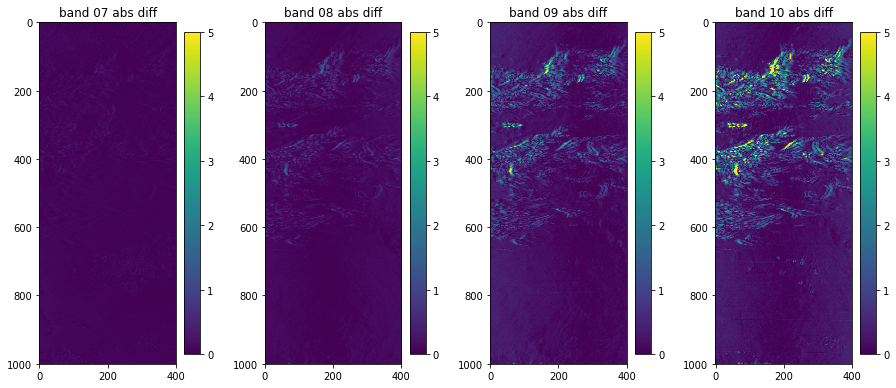

In [164]:
#setting same min/max bounds
fig, axs = plt.subplots(1, 4, figsize=(15, 25))
fig.subplots_adjust(wspace=0.4)

img0 = axs[0].imshow(diff_07,interpolation='none',vmin = 0, vmax=5)
axs[0].set_title('band 07 abs diff')
fig.colorbar(img0, ax=axs[0], fraction=0.1)

img1 = axs[1].imshow(diff_08,interpolation='none',vmin = 0, vmax=5)
axs[1].set_title('band 08 abs diff')
fig.colorbar(img1, ax=axs[1], fraction=0.1)

img2 = axs[2].imshow(diff_09,interpolation='none',vmin = 0, vmax=5)
axs[2].set_title('band 09 abs diff')
fig.colorbar(img2, ax=axs[2], fraction=0.1)

img3 = axs[3].imshow(diff_10,interpolation='none',vmin = 0, vmax=5)
axs[3].set_title('band 10 abs diff')
fig.colorbar(img3, ax=axs[3], fraction=0.1)

plt.show()

In [165]:
#repeating for other timestamp
diff_07 = abs(g17_07_data[1]-g16_07_data[1])
diff_08 = abs(g17_08_data[1]-g16_08_data[1])
diff_09 = abs(g17_09_data[1]-g16_09_data[1])
diff_10 = abs(g17_10_data[1]-g16_10_data[1])

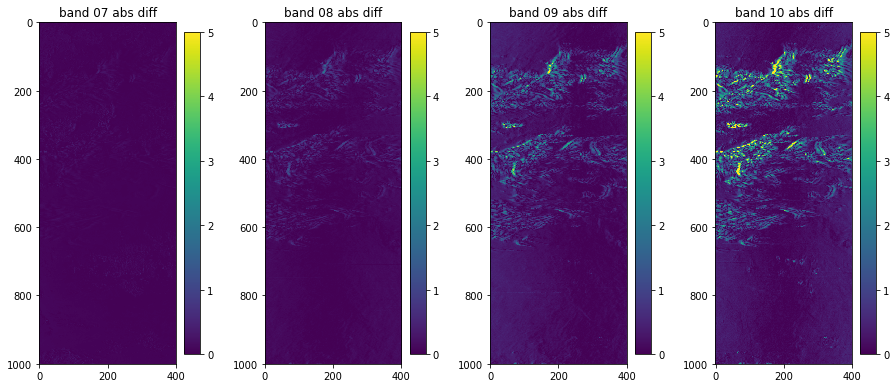

In [166]:
#setting same min/max bounds
fig, axs = plt.subplots(1, 4, figsize=(15, 25))
fig.subplots_adjust(wspace=0.4)

img0 = axs[0].imshow(diff_07,interpolation='none',vmin = 0, vmax=5)
axs[0].set_title('band 07 abs diff')
fig.colorbar(img0, ax=axs[0], fraction=0.1)

img1 = axs[1].imshow(diff_08,interpolation='none',vmin = 0, vmax=5)
axs[1].set_title('band 08 abs diff')
fig.colorbar(img1, ax=axs[1], fraction=0.1)

img2 = axs[2].imshow(diff_09,interpolation='none',vmin = 0, vmax=5)
axs[2].set_title('band 09 abs diff')
fig.colorbar(img2, ax=axs[2], fraction=0.1)

img3 = axs[3].imshow(diff_10,interpolation='none',vmin = 0, vmax=5)
axs[3].set_title('band 10 abs diff')
fig.colorbar(img3, ax=axs[3], fraction=0.1)

plt.show()

In [210]:
diff_07 = (g17_07_data[0]-g16_07_data[0])
diff_08 = (g17_08_data[0]-g16_08_data[0])
diff_09 = (g17_09_data[0]-g16_09_data[0])
diff_10 = (g17_10_data[0]-g16_10_data[0])

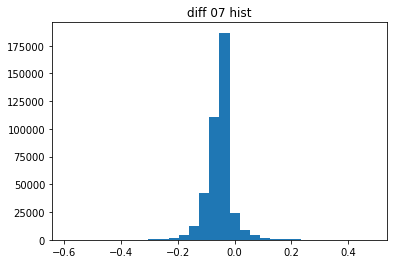

In [211]:
plt.hist(np.ravel(diff_07), 30)
plt.title('diff 07 hist')
plt.show()

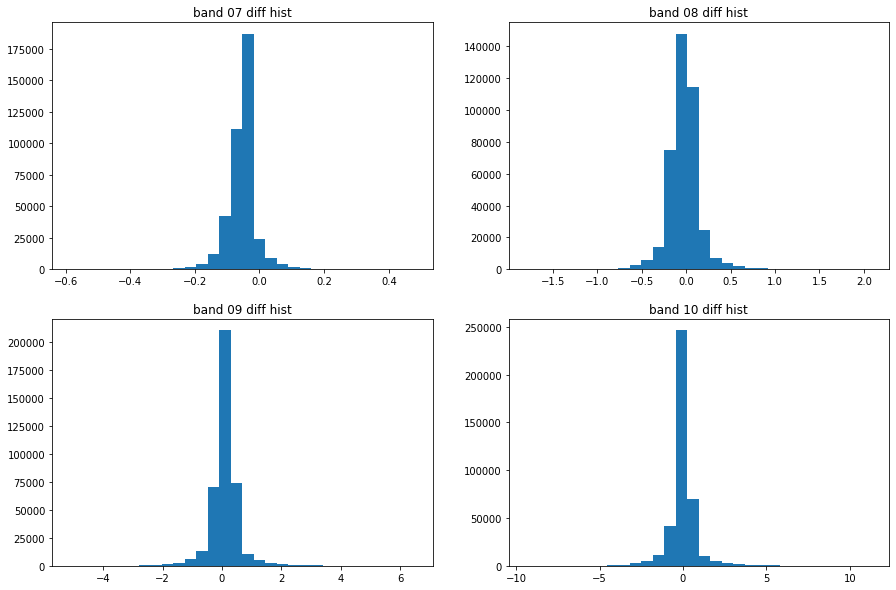

In [212]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.2, hspace=0.2)

axs[0,0].hist(np.ravel(diff_07), 30)
axs[0,0].set_title('band 07 diff hist')

axs[0,1].hist(np.ravel(diff_08), 30)
axs[0,1].set_title('band 08 diff hist')

axs[1,0].hist(np.ravel(diff_09), 30)
axs[1,0].set_title('band 09 diff hist')

axs[1,1].hist(np.ravel(diff_10), 30)
axs[1,1].set_title('band 10 diff hist')

plt.show()

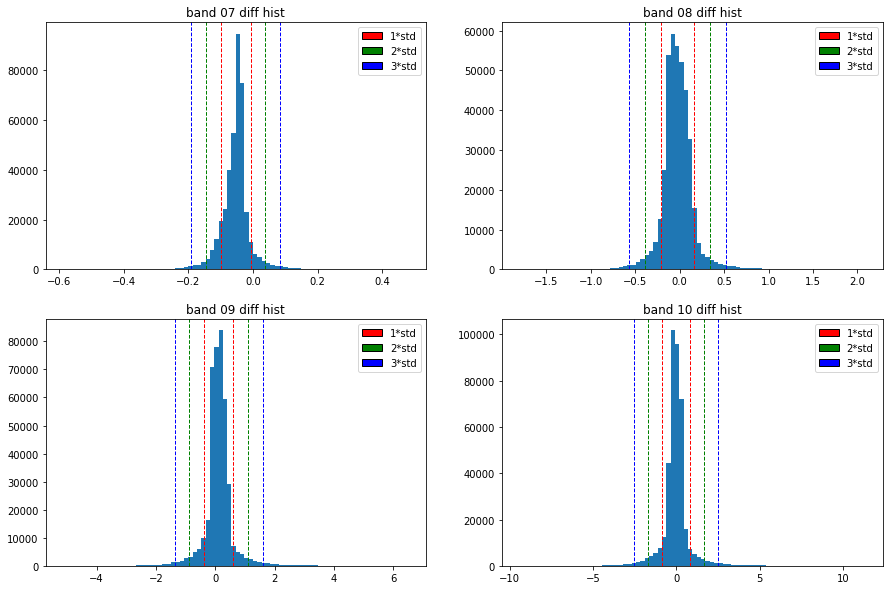

In [215]:
#adding std to histogram

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.2, hspace=0.2)

mult = [1, -1, 2, -2, 3, -3]
colors = ['r','r','g','g','b','b'] 

#diff 07
mean = np.mean(diff_07)
thresh = np.std(diff_07)
axs[0,0].hist(np.ravel(diff_07), 80)
axs[0,0].set_title('band 07 diff hist')
for i in range(6):
    axs[0,0].axvline(x=mean+mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["1*std","2*std", "3*std"]
axs[0,0].legend(handles, labels)

#diff 08
mean = np.mean(diff_08)
thresh = np.std(diff_08)
axs[0,1].hist(np.ravel(diff_08), 80)
axs[0,1].set_title('band 08 diff hist')
for i in range(6):
    axs[0,1].axvline(x=mean+mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["1*std","2*std", "3*std"]
axs[0,1].legend(handles, labels)

mean = np.mean(diff_09)
thresh = np.std(diff_09)
axs[1,0].hist(np.ravel(diff_09), 80)
axs[1,0].set_title('band 09 diff hist')
for i in range(6):
    axs[1,0].axvline(x=mean+mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["1*std","2*std", "3*std"]
axs[1,0].legend(handles, labels)

mean = np.mean(diff_10)
thresh = np.std(diff_10)
axs[1,1].hist(np.ravel(diff_10), 80)
axs[1,1].set_title('band 10 diff hist')
for i in range(6):
    axs[1,1].axvline(x=mean+mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["1*std","2*std", "3*std"]
axs[1,1].legend(handles, labels)


plt.show()

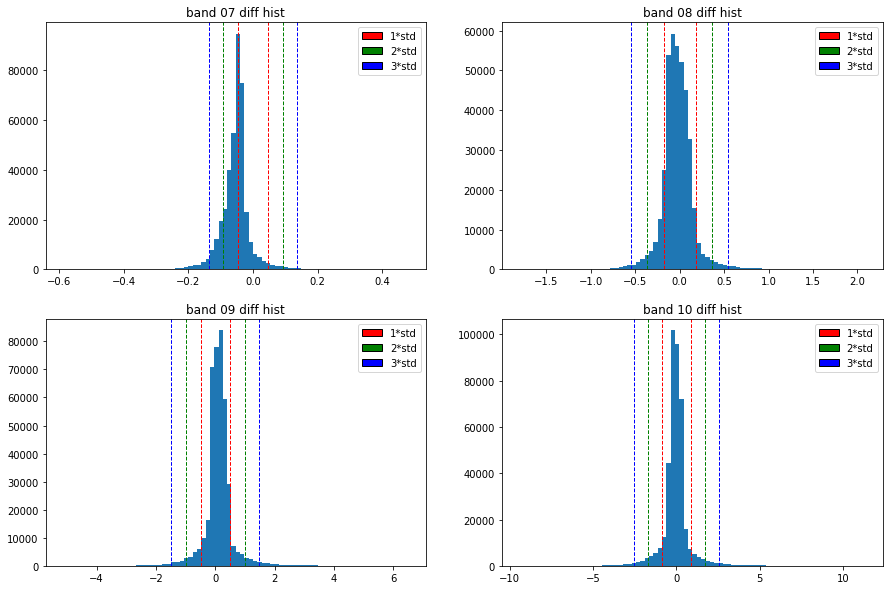

In [217]:
#std centered around 0 (current quailty label)

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.2, hspace=0.2)

mult = [1, -1, 2, -2, 3, -3]
colors = ['r','r','g','g','b','b'] 

#diff 07
thresh = np.std(diff_07)
axs[0,0].hist(np.ravel(diff_07), 80)
axs[0,0].set_title('band 07 diff hist')
for i in range(6):
    axs[0,0].axvline(x=mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["1*std","2*std", "3*std"]
axs[0,0].legend(handles, labels)

#diff 08
thresh = np.std(diff_08)
axs[0,1].hist(np.ravel(diff_08), 80)
axs[0,1].set_title('band 08 diff hist')
for i in range(6):
    axs[0,1].axvline(x=mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["1*std","2*std", "3*std"]
axs[0,1].legend(handles, labels)

thresh = np.std(diff_09)
axs[1,0].hist(np.ravel(diff_09), 80)
axs[1,0].set_title('band 09 diff hist')
for i in range(6):
    axs[1,0].axvline(x=mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["1*std","2*std", "3*std"]
axs[1,0].legend(handles, labels)

thresh = np.std(diff_10)
axs[1,1].hist(np.ravel(diff_10), 80)
axs[1,1].set_title('band 10 diff hist')
for i in range(6):
    axs[1,1].axvline(x=mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["1*std","2*std", "3*std"]
axs[1,1].legend(handles, labels)


plt.show()

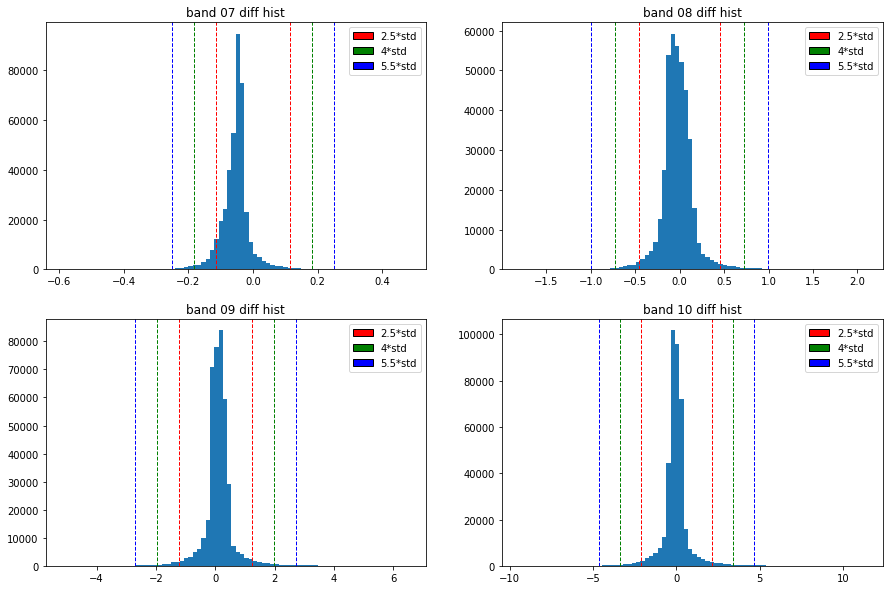

In [277]:
#quality flag labels test

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.2, hspace=0.2)

mult = [2.5, -2.5, 4, -4, 5.5, -5.5]
colors = ['r','r','g','g','b','b'] 

#diff 07
thresh = np.std(diff_07)
axs[0,0].hist(np.ravel(diff_07), 80)
axs[0,0].set_title('band 07 diff hist')
for i in range(6):
    axs[0,0].axvline(x=mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["2.5*std","4*std", "5.5*std"]
axs[0,0].legend(handles, labels)

#diff 08
thresh = np.std(diff_08)
axs[0,1].hist(np.ravel(diff_08), 80)
axs[0,1].set_title('band 08 diff hist')
for i in range(6):
    axs[0,1].axvline(x=mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["2.5*std","4*std", "5.5*std"]
axs[0,1].legend(handles, labels)

thresh = np.std(diff_09)
axs[1,0].hist(np.ravel(diff_09), 80)
axs[1,0].set_title('band 09 diff hist')
for i in range(6):
    axs[1,0].axvline(x=mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["2.5*std","4*std", "5.5*std"]
axs[1,0].legend(handles, labels)

thresh = np.std(diff_10)
axs[1,1].hist(np.ravel(diff_10), 80)
axs[1,1].set_title('band 10 diff hist')
for i in range(6):
    axs[1,1].axvline(x=mult[i]*thresh, color=colors[i], linestyle='dashed', linewidth=1)
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r', 'g', 'b']]
labels= ["2.5*std","4*std", "5.5*std"]
axs[1,1].legend(handles, labels)


plt.show()

In [238]:
#function to generate labels
def gen_label(g17, g16):
    n16 = g16.shape[0] * g16.shape[1]
    n17 = g17.shape[0] * g17.shape[1]
    
    diff_std = np.std(g16 - g17)
    abs_diff = abs(g16 - g17)
    
    label = abs_diff/diff_std
    
    label = abs(label-1)//1.5

    return label.astype(int)

In [242]:
label_07 = gen_label(g17_07_data[0], g16_07_data[0])
label_08 = gen_label(g17_08_data[0], g16_08_data[0])
label_09 = gen_label(g17_09_data[0], g16_09_data[0])
label_10 = gen_label(g17_10_data[0], g16_10_data[0])


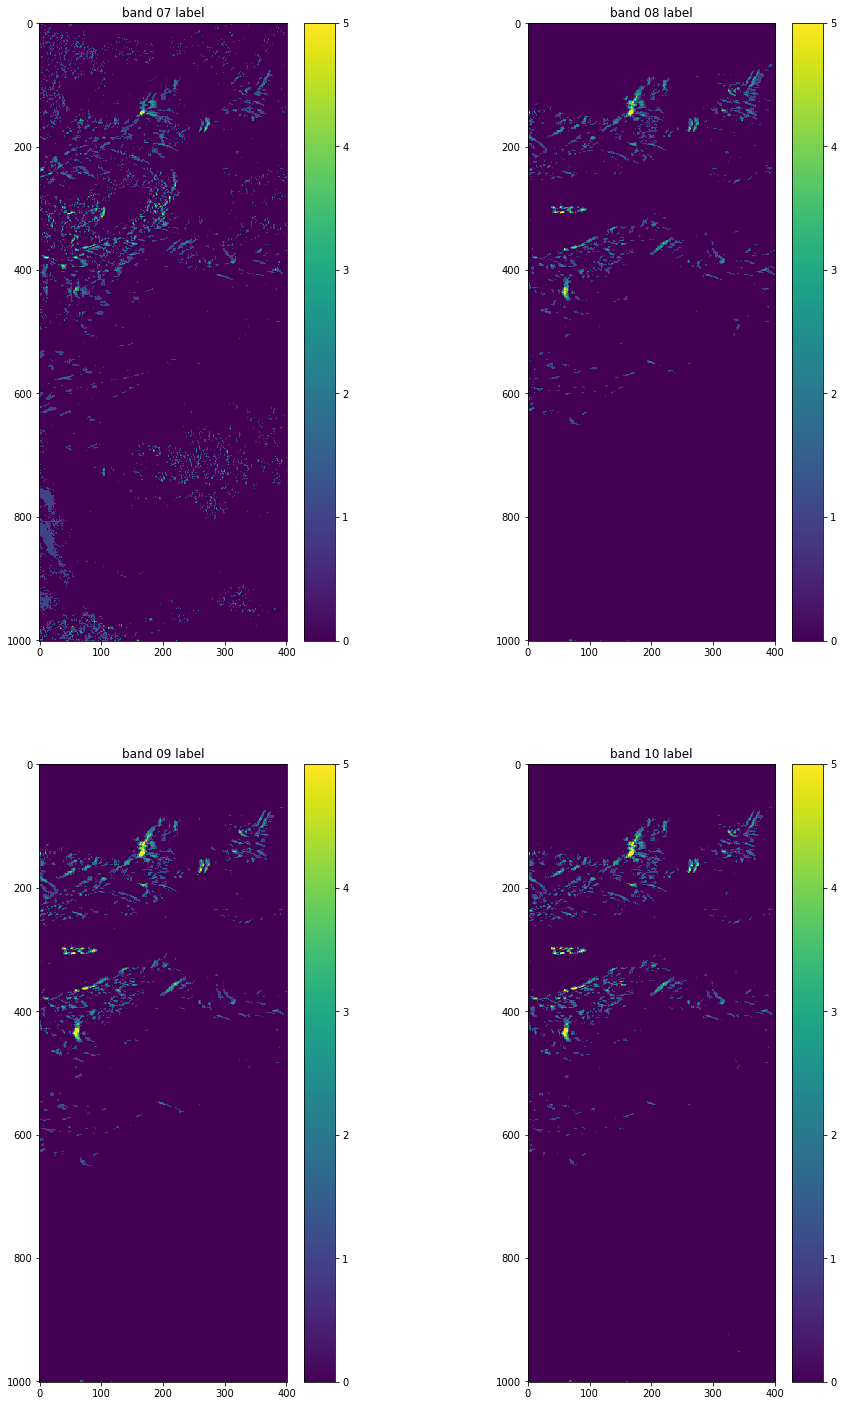

In [246]:
#labels on each band
fig, axs = plt.subplots(2, 2, figsize=(15, 25))
fig.subplots_adjust(wspace=0.4)

img0 = axs[0,0].imshow(label_07,interpolation='none',vmin = 0, vmax=5)
axs[0,0].set_title('band 07 label')
fig.colorbar(img0, ax=axs[0,0], fraction=0.1)

img1 = axs[0,1].imshow(label_08,interpolation='none',vmin = 0, vmax=5)
axs[0,1].set_title('band 08 label')
fig.colorbar(img1, ax=axs[0,1], fraction=0.1)

img2 = axs[1,0].imshow(label_09,interpolation='none',vmin = 0, vmax=5)
axs[1,0].set_title('band 09 label')
fig.colorbar(img2, ax=axs[1,0], fraction=0.1)

img3 = axs[1,1].imshow(label_10,interpolation='none',vmin = 0, vmax=5)
axs[1,1].set_title('band 10 label')
fig.colorbar(img3, ax=axs[1,1], fraction=0.1)

plt.show()

In [275]:
#mean voted label of four bands
stack = np.stack([label_07,label_08,label_09,label_10])
fin_label = np.round(np.mean(stack,axis=0))
fin_label.shape

(1001, 401)

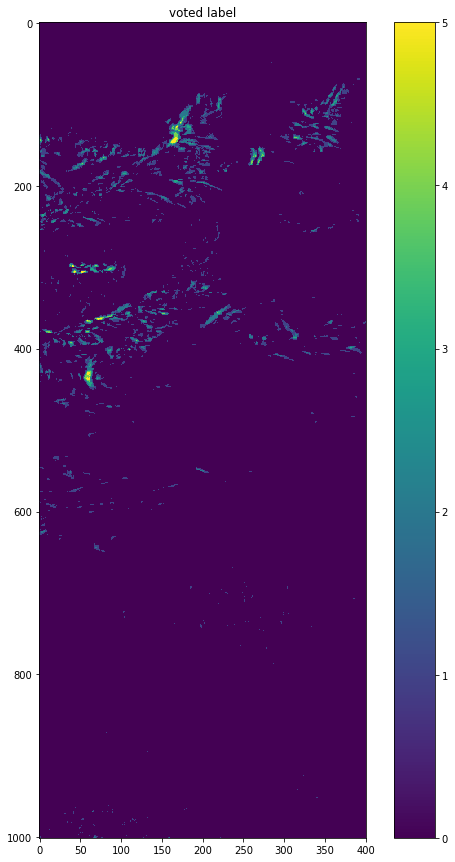

In [276]:
plt.figure(figsize=(10,15))
img0 = plt.imshow(fin_label,interpolation='none',vmin = 0, vmax=5)
plt.title('voted label')
plt.colorbar(img0, fraction=0.1)
plt.show()